In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
train_data_path = "C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\Cotton Disease\\train"
test_data_path = "C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\Cotton Disease\\test"

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [7]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [9]:
test_data = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='categorical')

Found 106 images belonging to 4 classes.


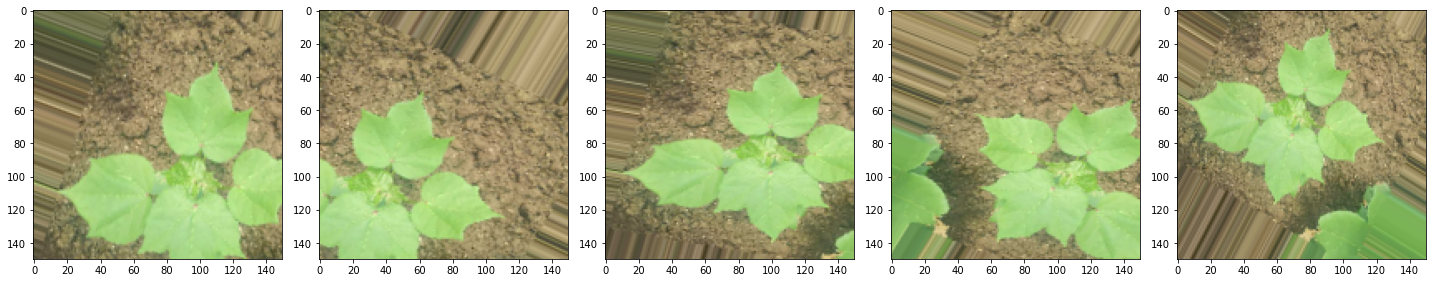

In [10]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [11]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') 
])

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= test_data,
                          )

Epoch 1/50
61/61 [==============================] - 50s 803ms/step - loss: 1.2398 - accuracy: 0.4418 - val_loss: 1.3899 - val_accuracy: 0.3208
Epoch 2/50
61/61 [==============================] - 48s 784ms/step - loss: 1.0544 - accuracy: 0.5597 - val_loss: 1.2843 - val_accuracy: 0.4245
Epoch 3/50
61/61 [==============================] - 49s 802ms/step - loss: 0.9352 - accuracy: 0.6207 - val_loss: 0.9056 - val_accuracy: 0.6415
Epoch 4/50
61/61 [==============================] - 50s 821ms/step - loss: 0.9292 - accuracy: 0.6320 - val_loss: 0.9366 - val_accuracy: 0.6132
Epoch 5/50
61/61 [==============================] - 51s 836ms/step - loss: 0.8347 - accuracy: 0.6715 - val_loss: 1.0621 - val_accuracy: 0.5660
Epoch 6/50
61/61 [==============================] - 53s 859ms/step - loss: 0.8351 - accuracy: 0.6663 - val_loss: 1.0277 - val_accuracy: 0.6038
Epoch 7/50
61/61 [==============================] - 50s 811ms/step - loss: 0.7738 - accuracy: 0.6966 - val_loss: 0.9081 - val_accuracy: 0.6132

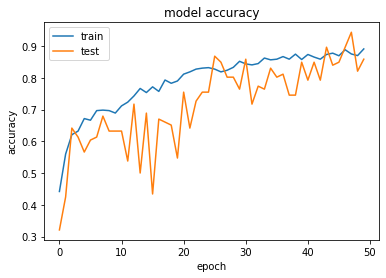

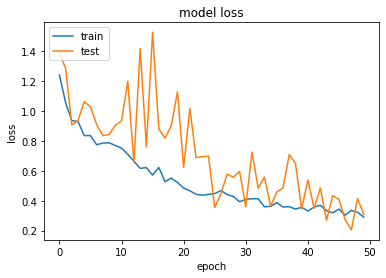

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
IMAGE_SIZE =(150,150)
def predict_it(image_location):
    test_image=image.load_img(image_location, target_size = IMAGE_SIZE)
    plt.imshow(test_image)
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    preds=np.argmax(model.predict(test_image))
    if preds==0:
        print("The leaf is diseased cotton leaf")
    elif preds==1:
        print("The leaf is diseased cotton plant")
    elif preds==2:
        print("The leaf is fresh cotton leaf")
    else:
        print("The leaf is fresh cotton plant")

1/1 [==============================] - 0s 202ms/step
The leaf is diseased cotton plant


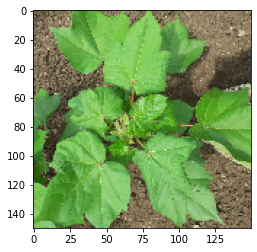

In [17]:
predict_it("C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\Cotton Disease\\val\\diseased cotton plant\\dd (14)_iaip.jpg")

1/1 [==============================] - 0s 26ms/step
The leaf is fresh cotton leaf


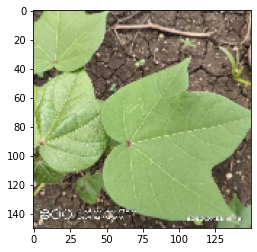

In [18]:
predict_it("C:\\Users\\kariketi.t.reddy\\Downloads\\Plants_disease_dataset\\Cotton Disease\\val\\fresh cotton leaf\\d (9)_iaip.jpg")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [24]:
model.save("cotton_disease.h5")